In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

In [3]:
file_133 = pd.read_csv(
    "calibration_data/test_133_20042023.txt", header=None, delim_whitespace=True)
file_293 = pd.read_csv(
    "calibration_data/test_293_20042023.txt", header=None, delim_whitespace=True)
file_407 = pd.read_csv(
    "calibration_data/test_407_20042023.txt", header=None, delim_whitespace=True)
file_555 = pd.read_csv(
    "calibration_data/test_555_20042023.txt", header=None, delim_whitespace=True)
file_1021 = pd.read_csv(
    "calibration_data/test_1021_20042023.txt", header=None, delim_whitespace=True)
file_2274 = pd.read_csv(
    "calibration_data/test_2274_20042023.txt", header=None, delim_whitespace=True)
file_5507 = pd.read_csv(
    "calibration_data/test_5507_20042023.txt", header=None, delim_whitespace=True)
file_10180 = pd.read_csv(
    "calibration_data/test_10180_20042023.txt", header=None, delim_whitespace=True)
file_16200 = pd.read_csv(
    "calibration_data/test_16200_20042023.txt", header=None, delim_whitespace=True)
files = [file_133, file_293, file_407, file_555, file_1021,
         file_2274, file_5507, file_10180, file_16200]
file_133[3] = file_133[3].astype(str)

mean = []
std = []

for f in files:
    f.columns = ['tmp', 'Event', 'Trg_time', 'P1', 'P2', 'P3']
    f.drop('tmp', axis=1, inplace=True)
    f['P1'] = f['P1'].apply(int, base=16)
    f['P2'] = f['P2'].apply(int, base=16)
    f['P3'] = f['P3'].apply(int, base=16)
    tmp_mean = (f['P1'].mean() + f['P2'].mean() + f['P3'].mean())/3
    tmp_std = np.sqrt((f['P1'].std()*f['P1'].std() + f['P2'].std()
                      * f['P2'].std() + f['P3'].std()*f['P3'].std()))/3
    mean.append(tmp_mean)
    std.append(tmp_std)

print(mean)
print(std)


[15.771973057335304, 58.00791295746785, 86.3144758735441, 122.8952722920407, 239.52708541043535, 570.0639671361502, 1357.9322308690014, 2535.4387855044074, 4060.489510489511]
[0.5563413945443026, 0.5665370447107784, 0.5453614914082324, 0.6220887024884572, 0.5918459270911903, 1.227861667636571, 0.7485012605225715, 0.5794766798601606, 1.1394595773526246]


Beta: [ 3.97899156 66.00910092]
Beta Std Error: [0.00938322 2.46034523]
Beta Covariance: [[ 2.21782438e-05 -2.29515766e-03]
 [-2.29515766e-03  1.52480851e+00]]
Residual Variance: 3.969874624205647
Inverse Condition #: 0.035671438071920004
Reason(s) for Halting:
  Sum of squares convergence


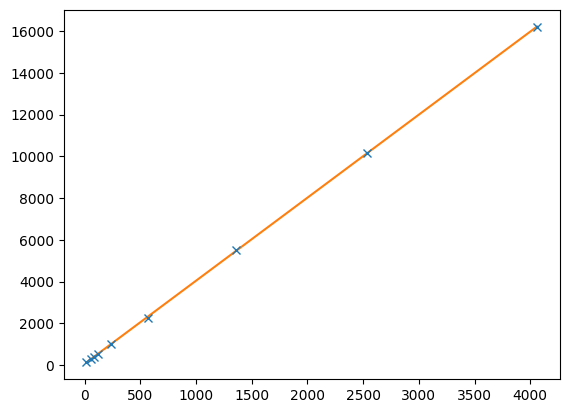

In [4]:
x = np.array(mean)
y = np.array([133.8, 293.2, 407.4, 555.0, 1021.0, 2274.0, 5507.0, 10180.0, 16200.0])

x_err = np.array(std)
y_err = np.array([0.450, 0.58, 0.969, 1.0, 3.0, 16.0, 18.0, 22.0, 25.0])

# Define a function (quadratic in our case) to fit the data with.
def quad_func(p, x):
     m, q = p
     return m*x + q

# Create a model for fitting.
quad_model = Model(quad_func)

# Create a RealData object using our initiated data from above.
data = RealData(x, y, sx=x_err, sy=y_err)

# Set up ODR with the model and data.
odr = ODR(data, quad_model, beta0=[0., 1.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

x_fit = np.linspace(x[0], x[-1], 1000)
y_fit = quad_func(out.beta, x_fit)

plt.errorbar(x, y, xerr=x_err, yerr=y_err, linestyle='None', marker='x')
plt.plot(x_fit, y_fit)

plt.show()